In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pyspark.sql import SparkSession

In [7]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Mall Customers Analysis") \
    .getOrCreate()

In [8]:
# Load Mall_Customers.csv into PySpark DataFrame
data = spark.read.csv('Mall_Customers.csv', header=True, inferSchema=True)

In [9]:
# Count number of rows
row_count = data.count()

In [10]:
# List of column names
column_names = data.columns

In [11]:
print("Number of rows:", row_count)
print("Number of columns:", len(column_names))
print("Column names:", column_names)

Number of rows: 200
Number of columns: 5
Column names: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [12]:
# Check schema and first few rows of the DataFrame
data.printSchema()
data.show(5)  # Show first 5 rows

root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
+----------+------+---+------------------+----------------------+
only showing top 5 rows



In [13]:
# Show last 10 rows
data_last_10 = data.orderBy(data['CustomerID'].desc()).limit(10)  # Assuming CustomerID is a unique identifier column
data_last_10.show()

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|       200|  Male| 30|               137|                    83|
|       199|  Male| 32|               137|                    18|
|       198|  Male| 32|               126|                    74|
|       197|Female| 45|               126|                    28|
|       196|Female| 35|               120|                    79|
|       195|Female| 47|               120|                    16|
|       194|Female| 38|               113|                    91|
|       193|  Male| 33|               113|                     8|
|       192|Female| 32|               103|                    69|
|       191|Female| 34|               103|                    23|
+----------+------+---+------------------+----------------------+



In [14]:
# Display DataFrame schema
data.printSchema()

# Display summary statistics
data.describe().show()

# List of column names
column_names = data.columns
print("Column names:", column_names)

root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)

+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID| Genre|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  NULL|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  NULL|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+---

In [15]:
from pyspark.sql.functions import col, sum

# Check for null values in each column
null_counts = data.select([sum(col(c).isNull().cast('integer')).alias(c) for c in data.columns])

# Display null counts
null_counts.show()

+----------+-----+---+------------------+----------------------+
|CustomerID|Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+-----+---+------------------+----------------------+
|         0|    0|  0|                 0|                     0|
+----------+-----+---+------------------+----------------------+



In [17]:
# Convert PySpark DataFrame to Pandas DataFrame
data_pandas = data.select('Annual Income (k$)').toPandas()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


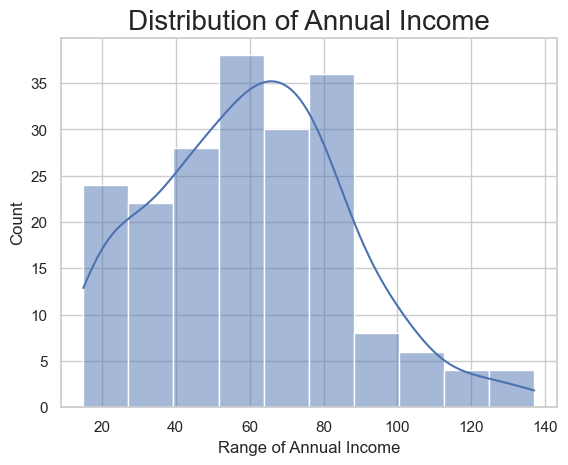

In [19]:
# Plot with Seaborn
sns.set(style='whitegrid')
sns.histplot(data_pandas['Annual Income (k$)'], kde=True)  # Use histplot for histogram
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

In [25]:
# Convert PySpark DataFrame to Pandas DataFrame
data_pandas = data.select('Age').toPandas()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


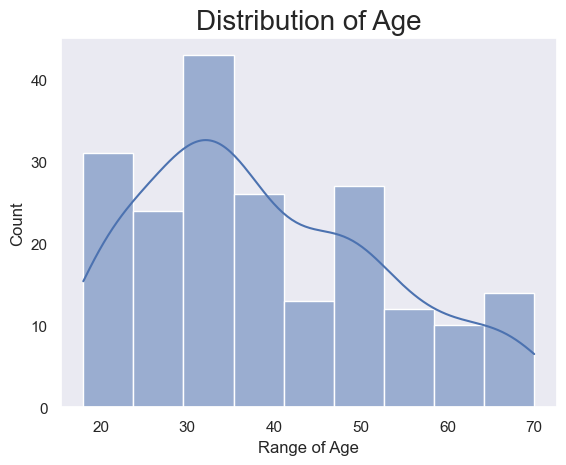

In [28]:
# Plot with Seaborn
sns.set(style='dark')
sns.histplot(data_pandas['Age'], kde=True)  # Use histplot for histogram
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [32]:
from pyspark.sql.functions import col, count

In [33]:
# Count occurrences of each category in the 'Genre' column
genre_counts = data.groupBy('Genre').agg(count('*').alias('Count'))

# Show the result
genre_counts.show()

+------+-----+
| Genre|Count|
+------+-----+
|Female|  112|
|  Male|   88|
+------+-----+



In [36]:
# Aggregate data to count occurrences of each gender
gender_counts = data.groupBy('Genre').agg(count('*').alias('Count'))

# Convert PySpark DataFrame to Pandas DataFrame for plotting
gender_counts_pandas = gender_counts.toPandas()

In [37]:
# Prepare data for pie chart
labels = gender_counts_pandas['Genre']
sizes = gender_counts_pandas['Count']
colors = ['lightgreen', 'orange']
explode = (0, 0.1)  # explode 'Male'


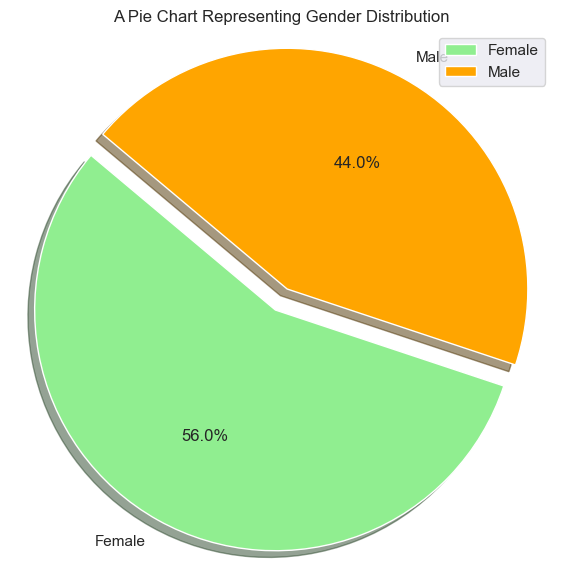

In [38]:
# Plotting the pie chart using matplotlib
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('A Pie Chart Representing Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

In [40]:
# Aggregate data to count occurrences of each age
age_counts = data.groupBy('Age').agg(count('*').alias('Count')).orderBy('Age')

# Convert PySpark DataFrame to Pandas DataFrame for plotting
age_counts_pandas = age_counts.toPandas()



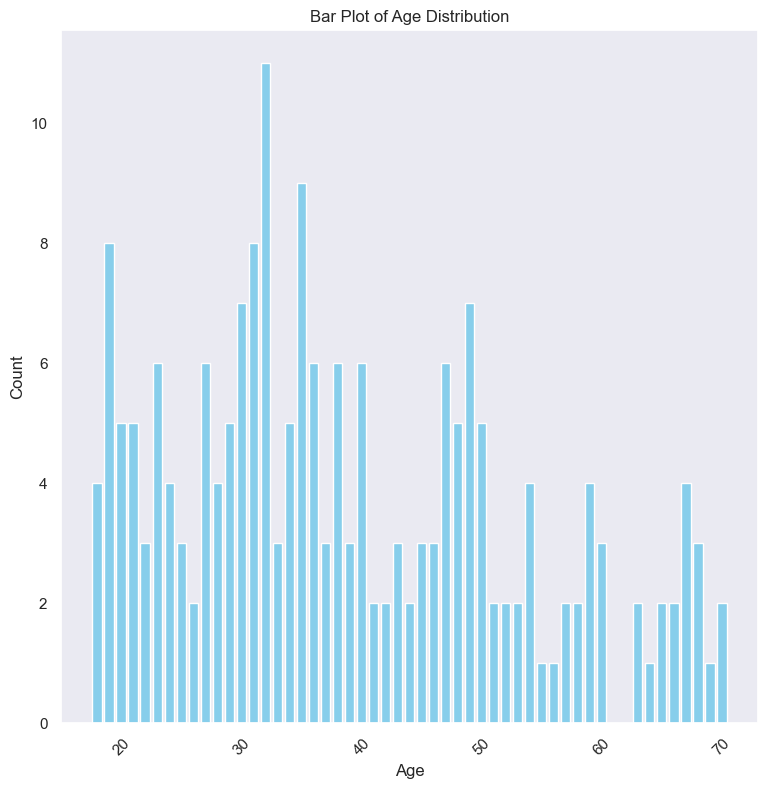

In [41]:
# Plotting the bar chart using matplotlib
plt.figure(figsize=(9, 9))
plt.bar(age_counts_pandas['Age'], age_counts_pandas['Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of Age Distribution')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Aggregate data to count occurrences of each annual income
income_counts = data.groupBy('Annual Income (k$)').agg(count('*').alias('Count')).orderBy('Annual Income (k$)')

# Convert PySpark DataFrame to Pandas DataFrame for plotting
income_counts_pandas = income_counts.toPandas()


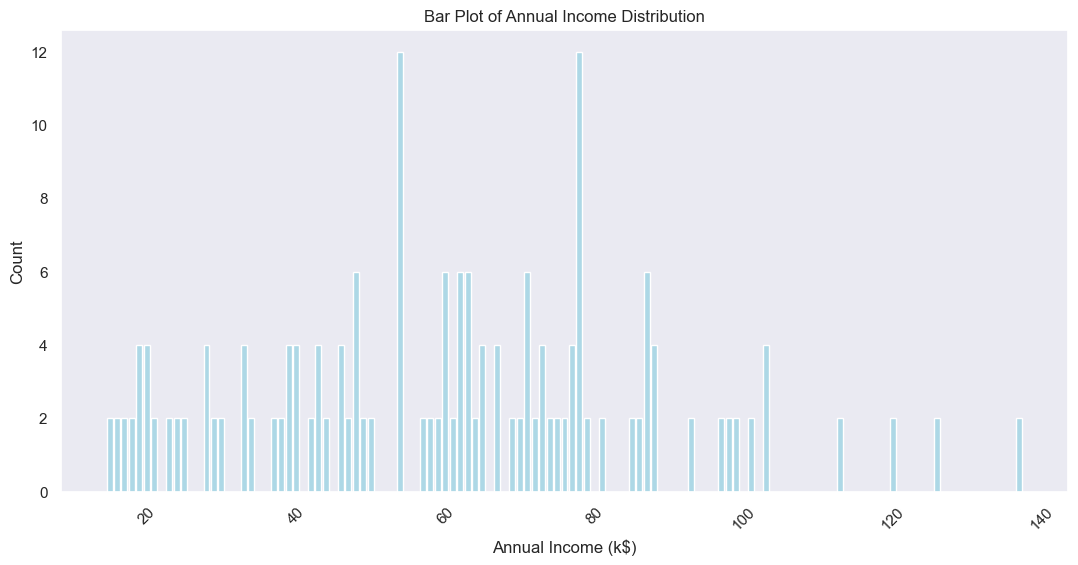

In [44]:
# Plotting the bar chart using matplotlib
plt.figure(figsize=(13, 6))
plt.bar(income_counts_pandas['Annual Income (k$)'], income_counts_pandas['Count'], color='lightblue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Bar Plot of Annual Income Distribution')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Aggregate data to count occurrences of each spending score
score_counts = data.groupBy('Spending Score (1-100)').agg(count('*').alias('Count')).orderBy('Spending Score (1-100)')

# Convert PySpark DataFrame to Pandas DataFrame for plotting
score_counts_pandas = score_counts.toPandas()

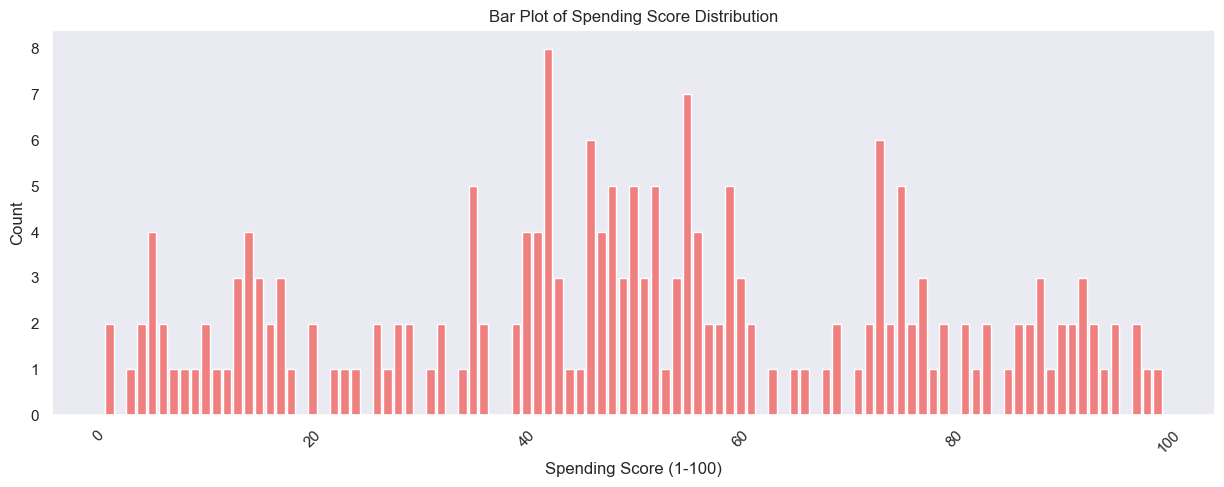

In [46]:
# Plotting the bar chart using matplotlib
plt.figure(figsize=(15, 5))
plt.bar(score_counts_pandas['Spending Score (1-100)'], score_counts_pandas['Count'], color='lightcoral')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Bar Plot of Spending Score Distribution')
plt.xticks(rotation=45)
plt.show()

In [55]:
# Select relevant columns
selected_columns = ['CustomerID' ,'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data_selected = data.select(selected_columns)


In [56]:
# Convert PySpark DataFrame to Pandas DataFrame for plotting with seaborn
data_pandas = data_selected.toPandas()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

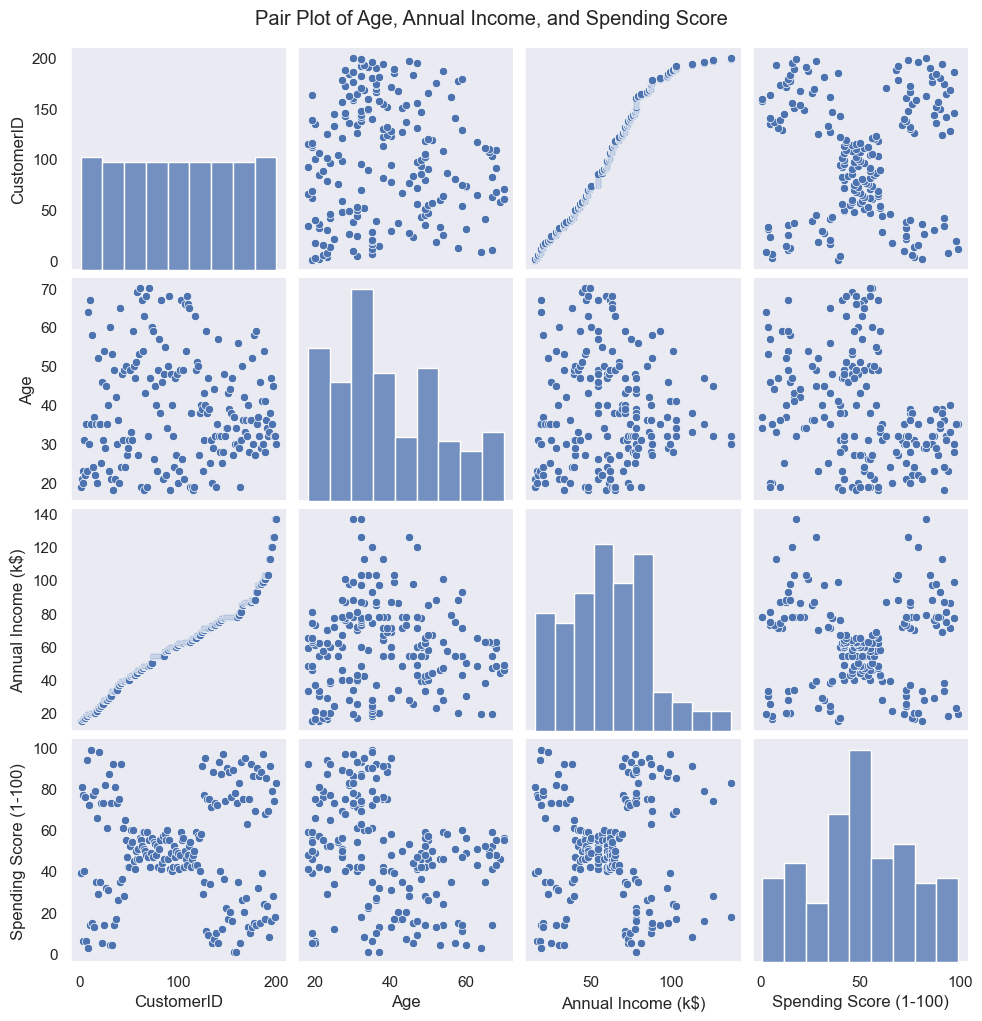

In [57]:
# Plot pairplot using seaborn
sns.pairplot(data_pandas)
plt.suptitle('Pair Plot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()

In [59]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

In [60]:
# Assemble features into a single column
vectorAssembler = VectorAssembler(inputCols=selected_columns, outputCol='features')
data_assembled = vectorAssembler.transform(data_selected)


In [61]:
# Calculate correlation matrix
corr_matrix = Correlation.corr(data_assembled, 'features').head()[0]

In [62]:
# Convert PySpark correlation matrix to Pandas DataFrame for plotting
import pandas as pd
columns = selected_columns
corr_matrix_pandas = pd.DataFrame(corr_matrix.toArray(), columns=columns, index=columns)

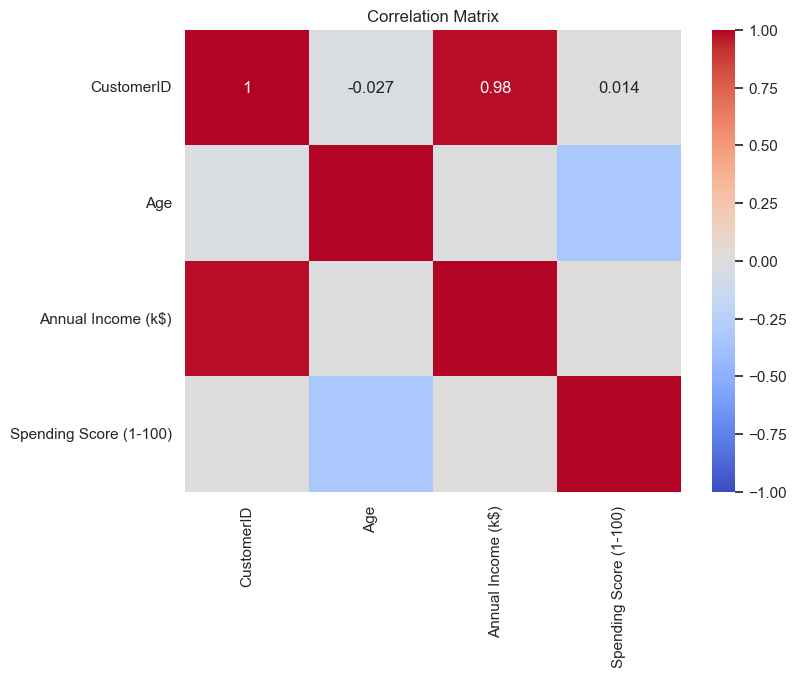

In [63]:
# Plot correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pandas, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

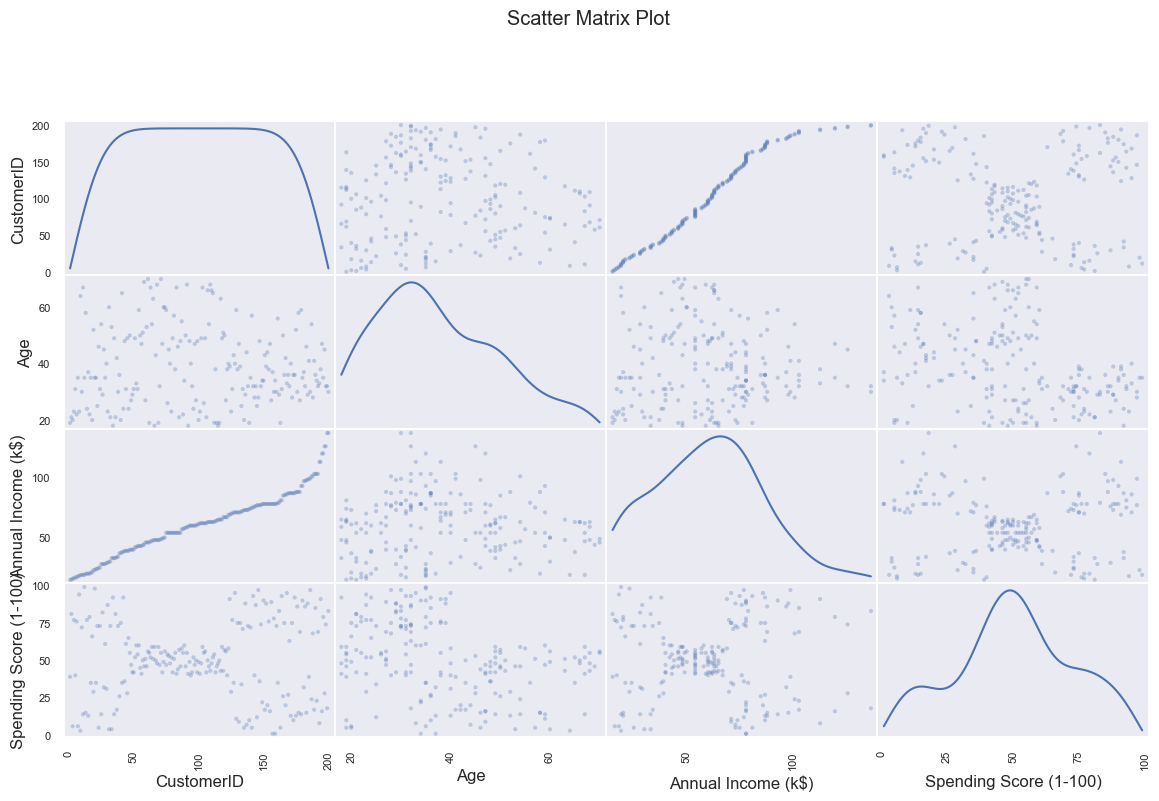

In [65]:
# Plot scatter matrix using pandas and matplotlib
pd.plotting.scatter_matrix(data_pandas, alpha=0.3, figsize=(14, 8), diagonal='kde')
plt.suptitle('Scatter Matrix Plot', y=1.02)
plt.show()

In [66]:
# Convert PySpark correlation matrix to Pandas DataFrame for plotting
import pandas as pd
columns = selected_columns
corr_matrix_pandas = pd.DataFrame(corr_matrix.toArray(), columns=columns, index=columns)


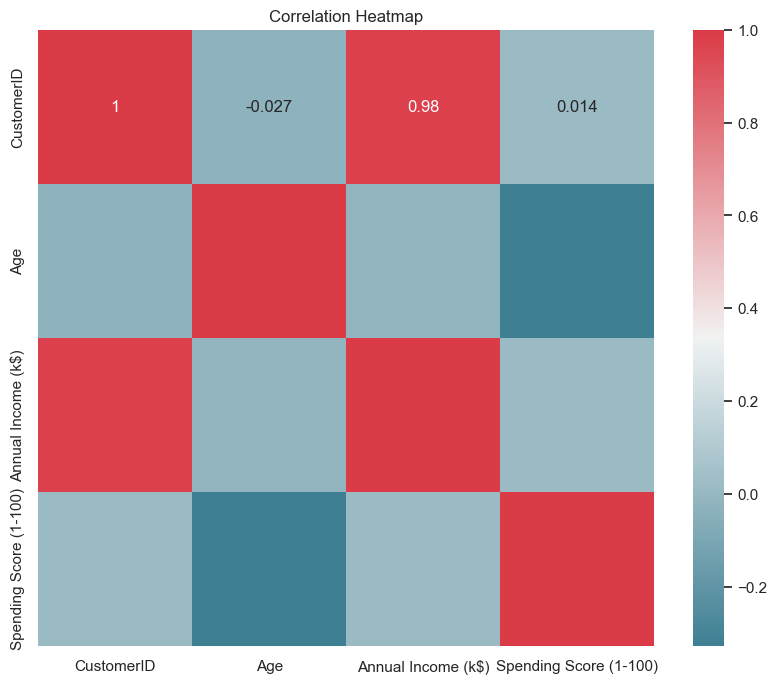

In [68]:


# Plot correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pandas, mask=np.zeros_like(corr_matrix_pandas, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [72]:

# Convert PySpark DataFrame to Pandas DataFrame for plotting
pd_data = data.select('CustomerID', 'Annual Income (k$)').toPandas()


In [73]:
# Extract x and y data
x = pd_data['CustomerID']
y = pd_data['Annual Income (k$)']

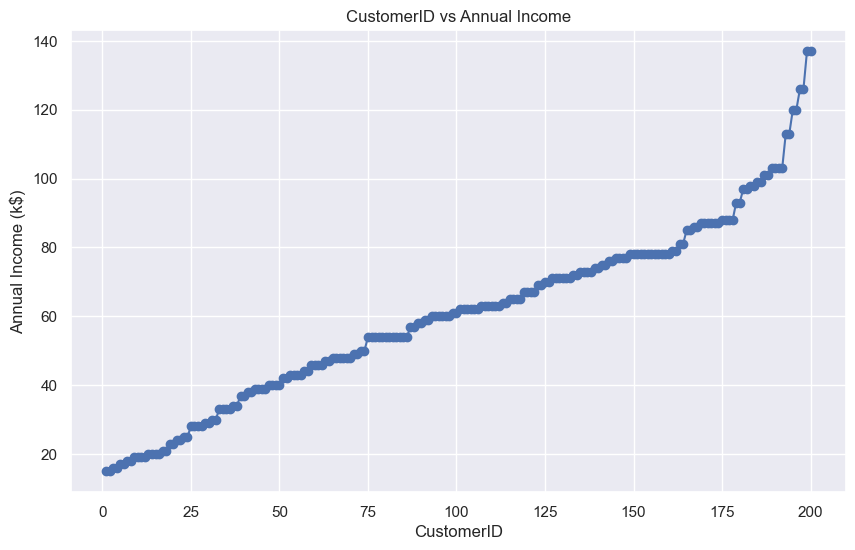

In [74]:
# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('CustomerID vs Annual Income')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.grid(True)
plt.show()

In [75]:
# Convert PySpark DataFrame to Pandas DataFrame for plotting
pd_data = data.select('Annual Income (k$)', 'Age').toPandas()


In [76]:
# Extract x and y data
x = pd_data['Annual Income (k$)']
y = pd_data['Age']

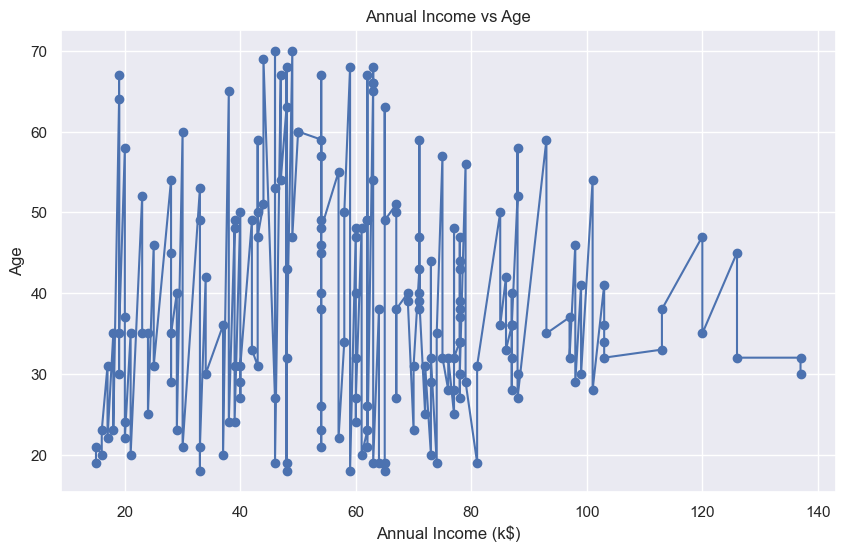

In [77]:
# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Annual Income vs Age')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [93]:
from pyspark.ml.clustering import KMeans

from sklearn.cluster import KMeans

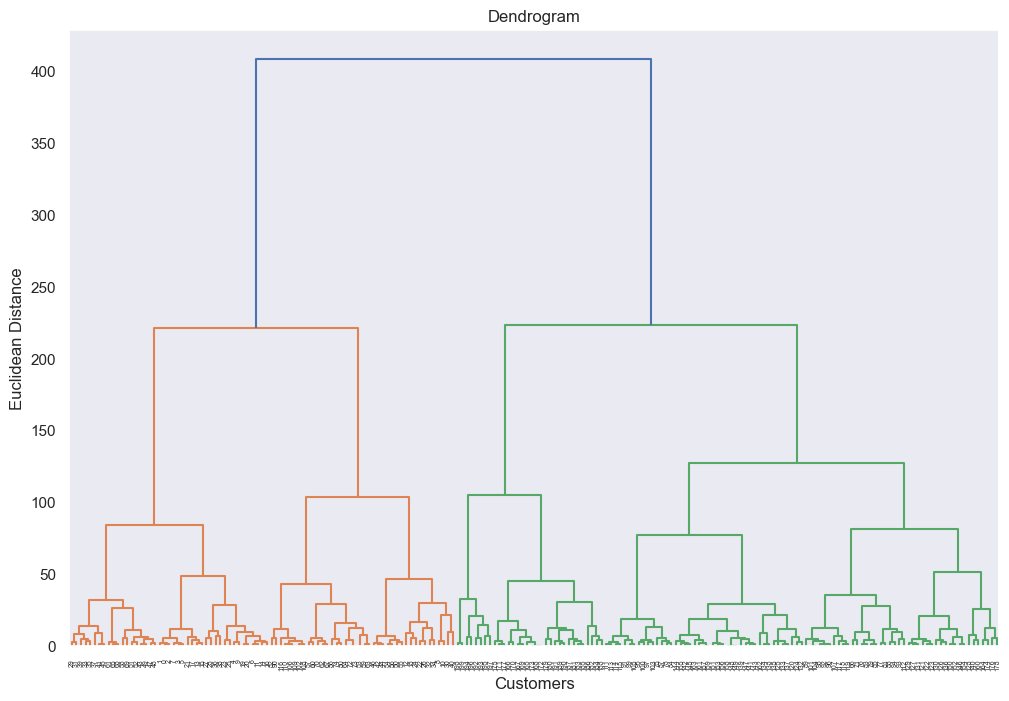

In [120]:
# Example assuming 'data_features' is a PySpark DataFrame with numeric columns
numeric_cols = ['Annual Income (k$)', 'Age']  # Adjust according to your data
data_numeric = data_features.select(numeric_cols)

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = data_numeric.toPandas()

# Compute linkage matrix
linkage_matrix = sch.linkage(pandas_df.values, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [121]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

In [122]:
# Assuming 'data_features' is a PySpark DataFrame with numeric columns
# Extract and convert to NumPy array
x = np.array(data_features.select('Annual Income (k$)', 'Age').collect())

In [123]:
# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


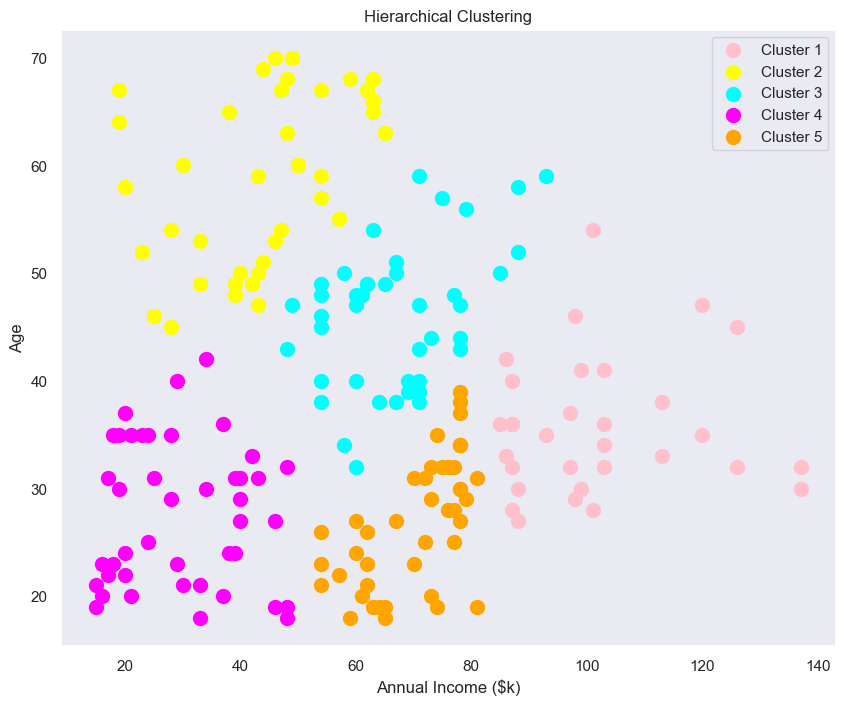

In [124]:
# Visualize the clusters
plt.figure(figsize=(10, 8))

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c='pink', label='Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=100, c='magenta', label='Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=100, c='orange', label='Cluster 5')

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Age')
plt.legend()
plt.show()

Clusters of Customers Based on their Ages

In [125]:

data.columns

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [127]:
# Now, convert to NumPy array
x = pandas_df[['Age', 'Annual Income (k$)']].values
x.shape  # This will print the shape of x

(200, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

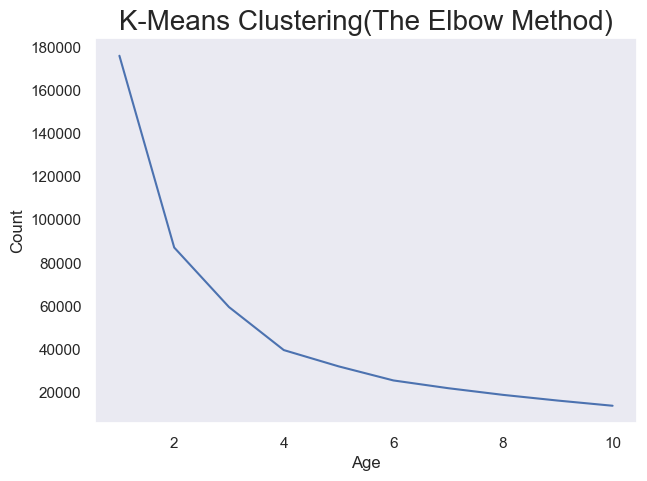

In [128]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


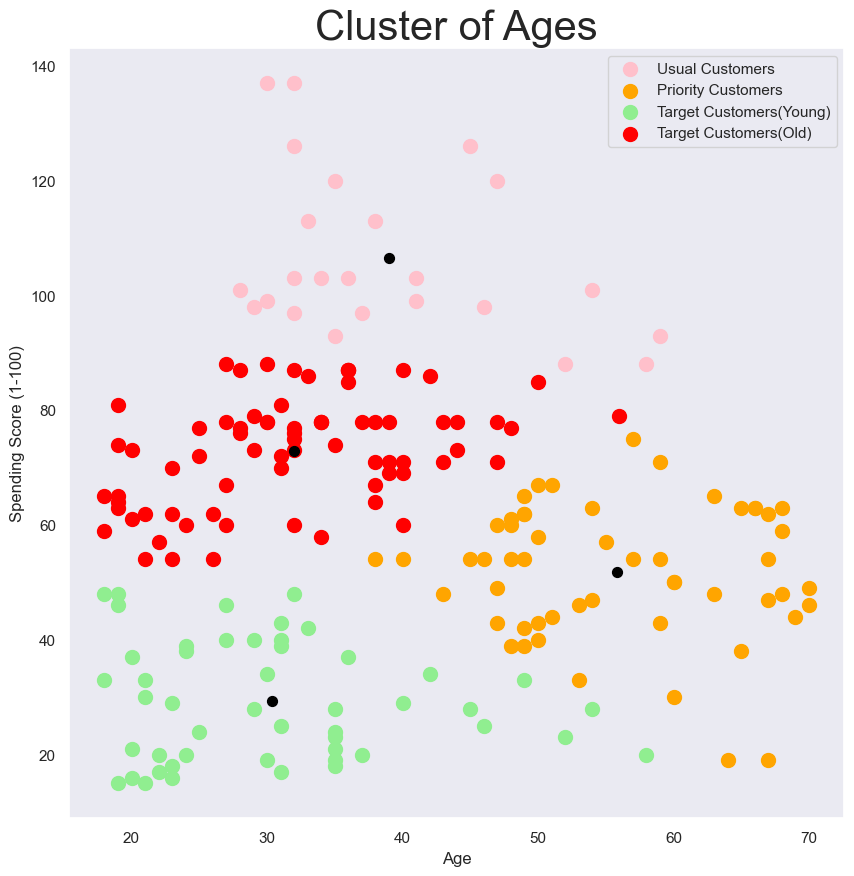

In [129]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [132]:
from pyspark.ml.feature import StringIndexer
# Assuming 'data' is your PySpark DataFrame

# Step 1: Use StringIndexer to transform 'Genre' column
indexer = StringIndexer(inputCol='Genre', outputCol='GenreIndex')
indexed_data = indexer.fit(data).transform(data)

In [133]:
# Step 2: Replace original 'Genre' column with 'GenreIndex'
indexed_data = indexed_data.drop('Genre').withColumnRenamed('GenreIndex', 'Genre')


In [134]:
# Step 3: Show value counts for the 'Genre' column
indexed_data.groupBy('Genre').count().show()

+-----+-----+
|Genre|count|
+-----+-----+
|  0.0|  112|
|  1.0|   88|
+-----+-----+



In [138]:
# Now, convert to NumPy array
x = pandas_df[['Age', 'Annual Income (k$)']].values
x.shape  # This will print the shape of x

(200, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

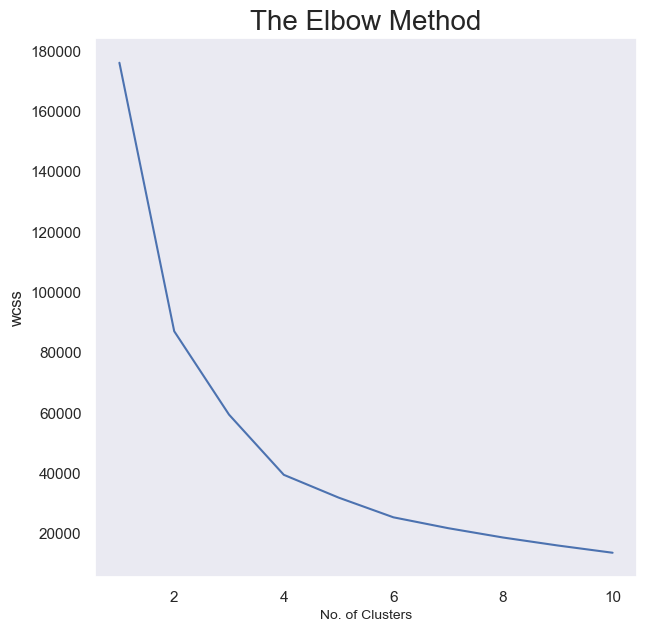

In [139]:

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


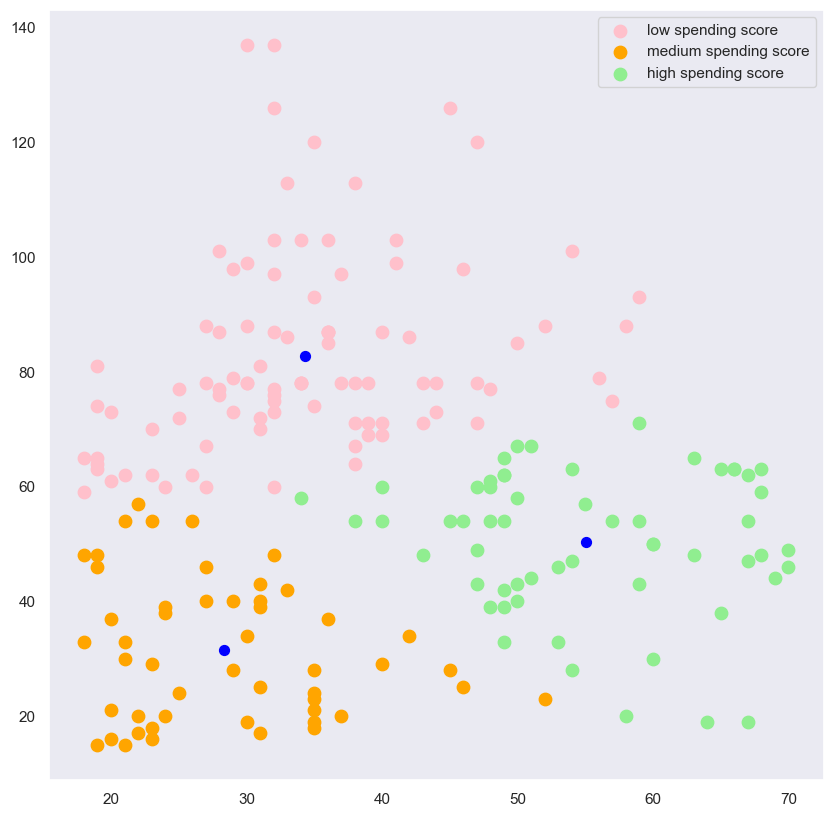

In [140]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

From the cluster plot above, it's evident that both males and females are represented across all spending score categories—high, low, and medium. The distribution shows that there isn't a significant skew towards one gender dominating any particular spending behavior category. This indicates a relatively balanced distribution of spending habits between males and females across the dataset.

INFERENCES:

We have data for 200 customers in our dataset.

The age of our customers ranges from 18 to 70 years. The average age is 38 years, with the median slightly lower at 36 years. This suggests that there are more younger customers in our dataset, indicated by the mean being greater than the median.

Customers' annual incomes vary between 15,000 USD and 137,000 USD. The average income is around 60,000 USD, very close to the median income of 61,000 USD.

Spending Score is a metric derived from customer behavior and purchase patterns. Scores range from 1 to 99, with an average and median score of 50. This indicates a balanced distribution of spending behavior among our customers.

These insights highlight the demographic and spen